In [ ]:
# %run /home/mszul/git/DANC_multilayer_laminar/01_source_power_per_vertex.py 0 0 /home/mszul/git/DANC_multilayer_laminar/settings.json

In [2]:
import fooofinator3
from mne import read_epochs
from mne.time_frequency import psd_array_welch
from mne.filter import filter_data
import numpy as np
import matplotlib.pylab as plt

In [4]:
epochs = read_epochs("/home/common/bonaiuto/multiburst/derivatives/processed/sub-001/ses-01/autoreject-sub-001-ses-01-003-visual-epo.fif", verbose=False)
sfreq = epochs.info["sfreq"]
epochs = epochs.pick_types(meg=True, ref_meg=False, misc=False)
epochs = epochs.get_data()
winsize = int(sfreq)
overlap = int(winsize/2)
psds, freqs = psd_array_welch(
    epochs, sfreq, fmin=0.1, fmax=120, n_fft=2000, 
    n_overlap=overlap, n_per_seg=winsize, window="hann", 
    verbose=False
)
psds = np.mean(psds, axis=0)

In [37]:
ff = fooofinator3.FOOOFinator()
ff.fit(freqs, psds[33], [0.1, 125], n_jobs=-1)

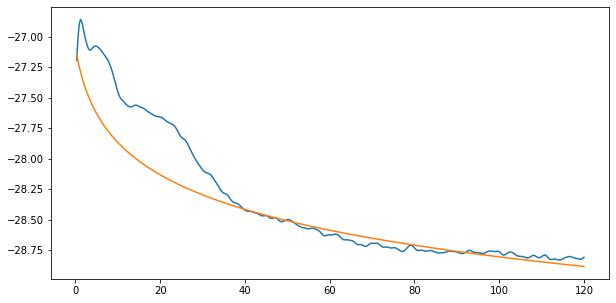

In [38]:
f, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(ff.freqs, np.log10(psds[33]))
ax.plot(ff.freqs, ff._ap_fit)

In [27]:
np.save("psd_meg.npy", psds[3])

In [30]:
freqs

array([  0.3,   0.6,   0.9,   1.2,   1.5,   1.8,   2.1,   2.4,   2.7,
         3. ,   3.3,   3.6,   3.9,   4.2,   4.5,   4.8,   5.1,   5.4,
         5.7,   6. ,   6.3,   6.6,   6.9,   7.2,   7.5,   7.8,   8.1,
         8.4,   8.7,   9. ,   9.3,   9.6,   9.9,  10.2,  10.5,  10.8,
        11.1,  11.4,  11.7,  12. ,  12.3,  12.6,  12.9,  13.2,  13.5,
        13.8,  14.1,  14.4,  14.7,  15. ,  15.3,  15.6,  15.9,  16.2,
        16.5,  16.8,  17.1,  17.4,  17.7,  18. ,  18.3,  18.6,  18.9,
        19.2,  19.5,  19.8,  20.1,  20.4,  20.7,  21. ,  21.3,  21.6,
        21.9,  22.2,  22.5,  22.8,  23.1,  23.4,  23.7,  24. ,  24.3,
        24.6,  24.9,  25.2,  25.5,  25.8,  26.1,  26.4,  26.7,  27. ,
        27.3,  27.6,  27.9,  28.2,  28.5,  28.8,  29.1,  29.4,  29.7,
        30. ,  30.3,  30.6,  30.9,  31.2,  31.5,  31.8,  32.1,  32.4,
        32.7,  33. ,  33.3,  33.6,  33.9,  34.2,  34.5,  34.8,  35.1,
        35.4,  35.7,  36. ,  36.3,  36.6,  36.9,  37.2,  37.5,  37.8,
        38.1,  38.4,